# Zomato Data Analysis Project

## Importing necessary Python libraries

In [9]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [13]:
df=pd.read_csv('Zomato data .csv')
df

,name,online_order,book_table,rate,votes,approx_cost(for two people),listed_in(type)
0,Jalsa,Yes,Yes,4.1/5,775,800,Buffet
1,Spice Elephant,Yes,No,4.1/5,787,800,Buffet
2,San Churro Cafe,Yes,No,3.8/5,918,800,Buffet
3,Addhuri Udupi Bhojana,No,No,3.7/5,88,300,Buffet
4,Grand Village,No,No,3.8/5,166,600,Buffet
...,...,...,...,...,...,...,...
143,Melting Melodies,No,No,3.3/5,0,100,Dining
144,New Indraprasta,No,No,3.3/5,0,150,Dining
145,Anna Kuteera,Yes,No,4.0/5,771,450,Dining
146,Darbar,No,No,3.0/5,98,800,Dining


## Convert the data type of column-'rate' 

In [17]:
def handlerate(value):
    value=str(value).split('/')
    value=value[0]
    return float(value)

df['rate']=df['rate'].apply(handlerate)
df.head()

,name,online_order,book_table,rate,votes,approx_cost(for two people),listed_in(type)
0,Jalsa,Yes,Yes,4.1,775,800,Buffet
1,Spice Elephant,Yes,No,4.1,787,800,Buffet
2,San Churro Cafe,Yes,No,3.8,918,800,Buffet
3,Addhuri Udupi Bhojana,No,No,3.7,88,300,Buffet
4,Grand Village,No,No,3.8,166,600,Buffet


## Checking null values

In [20]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 148 entries, 0 to 147
Data columns (total 7 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   name                         148 non-null    object 
 1   online_order                 148 non-null    object 
 2   book_table                   148 non-null    object 
 3   rate                         148 non-null    float64
 4   votes                        148 non-null    int64  
 5   approx_cost(for two people)  148 non-null    int64  
 6   listed_in(type)              148 non-null    object 
dtypes: float64(1), int64(2), object(4)
memory usage: 8.2+ KB


#### ***No null values found***

## Types of Resturants

Text(0.5, 1.0, 'Types of Resturants')

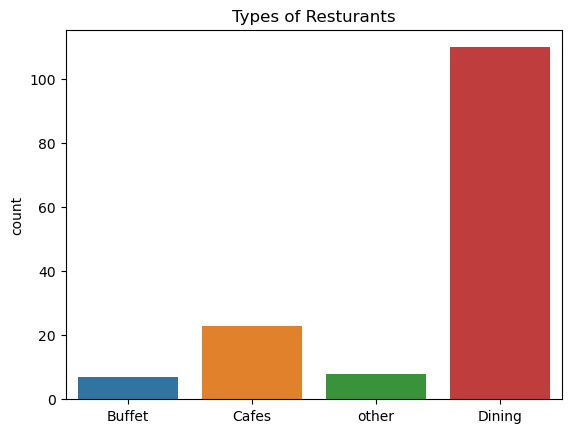

In [41]:
sns.countplot(x=df['listed_in(type)'])
plt.xlabel('')
plt.title('Types of Resturants')

#### ***Majority of resturants falls in dinning category.***

## Votes by type of resturants

Text(0, 0.5, 'Votes')

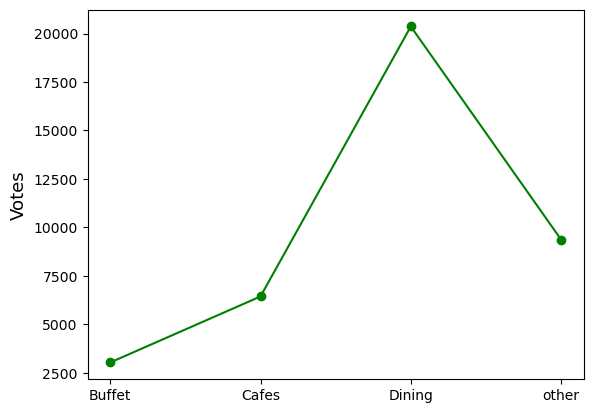

In [66]:
group=df.groupby('listed_in(type)')['votes'].sum()
result=pd.DataFrame({'votes':group})
plt.plot(result,c='green', marker='o')
plt.ylabel('Votes', size=13)

#### ***Dining resturants have recieved the maximum votes.***

## Rating disrbution of resturants

Text(0.5, 0, 'Ratings')

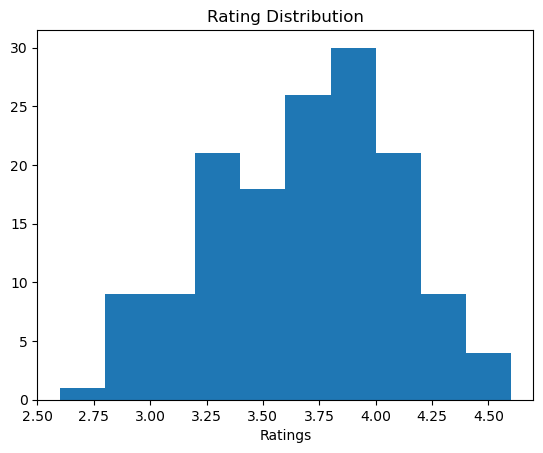

In [75]:
plt.hist(df['rate'], bins=10)
plt.title('Rating Distribution')
plt.xlabel('Ratings')

#### ***The majority of rasturants have been recieved a range of rating of 3.75 - 4.1***

## Average spenditure of couples

Text(0.5, 0, 'Couple Spenditure')

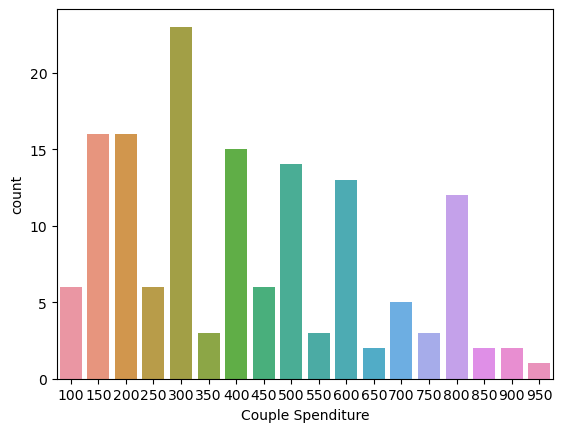

In [84]:
couple=df['approx_cost(for two people)']
sns.countplot(x=couple)
plt.xlabel('Couple Spenditure')

#### ***Majority of couples orders food worth Rs.300***

## Rating in terms of mode

Text(0, 0.5, 'Ratings')

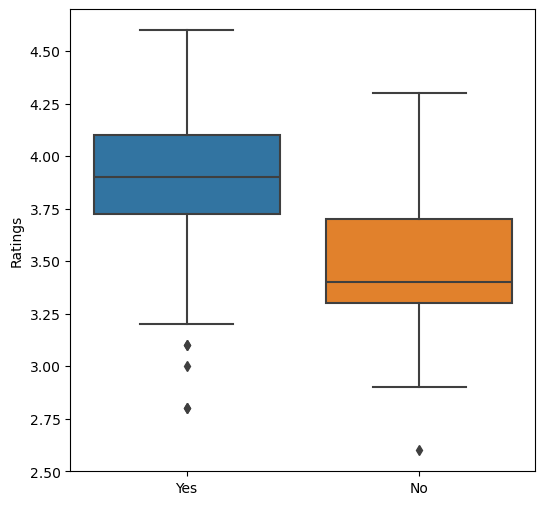

In [91]:
plt.figure(figsize=(6,6))
sns.boxplot(x='online_order', y='rate',data=df)
plt.xlabel('')
plt.ylabel('Ratings')

#### Yes - Online mode
#### No - Offline mode

#### ***Offline orders recieves lower rating in comparison to online orders.***

## Type of resturants recieves more offline orders

Text(0.5, 1.0, 'Heatmap')

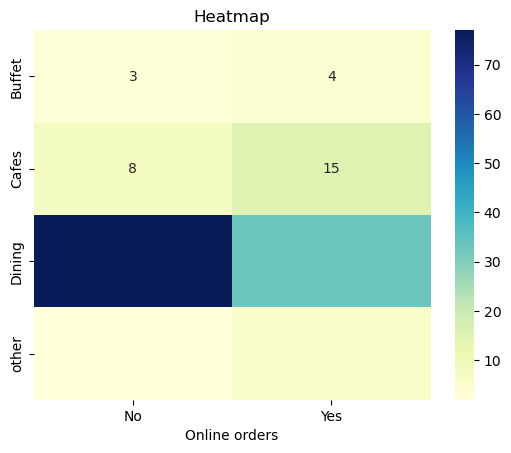

In [118]:
pivot_table=df.pivot_table(index='listed_in(type)', columns='online_order', aggfunc='size', fill_value=0)
sns.heatmap(pivot_table, annot=True, cmap='YlGnBu', fmt='d')
plt.xlabel('Online orders')
plt.ylabel('')
plt.title('Heatmap')

#### ***Dining resturants recieves more offline orders while cafes recieves more online orders.***